In [1]:
import pandas as pd

In [2]:
import sklearn.metrics
from fastai.script import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.distributed import *
from fastprogress import fastprogress
from torchvision.models import *

In [3]:
np.random.seed(42)

In [4]:
src = (ImageList.from_folder(path='train-snakes-cropped').split_by_rand_pct(0.2).label_from_folder())

In [5]:
tfms=([rotate(degrees=(-90,90), p=0.8)],[])

In [6]:
data = (src.transform(tfms, size=32, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=8).normalize(imagenet_stats))

In [7]:
data.valid_ds.y.items

array([19, 33, 35, 12, ..., 22, 11, 29, 22])

In [400]:
df_pred = pd.read_csv('y_probs.csv',low_memory=False)

In [9]:
y_true = data.valid_ds.y.items[1:]

In [10]:
y_pred = []
for i,row in df_pred.iterrows():
    temp = np.asarray(row[:])
    y_pred.append(np.argmax(temp))

In [11]:
y_pred

[33,
 35,
 12,
 38,
 4,
 42,
 18,
 29,
 8,
 38,
 44,
 42,
 4,
 32,
 20,
 4,
 12,
 25,
 15,
 6,
 29,
 34,
 32,
 4,
 38,
 3,
 18,
 8,
 1,
 8,
 30,
 12,
 8,
 23,
 1,
 25,
 42,
 26,
 35,
 12,
 25,
 13,
 35,
 28,
 4,
 3,
 40,
 4,
 28,
 31,
 13,
 44,
 35,
 42,
 3,
 30,
 44,
 35,
 26,
 8,
 11,
 31,
 36,
 23,
 36,
 31,
 16,
 20,
 4,
 3,
 17,
 4,
 9,
 35,
 21,
 20,
 4,
 4,
 40,
 26,
 42,
 12,
 13,
 22,
 29,
 8,
 8,
 4,
 40,
 30,
 8,
 15,
 31,
 30,
 42,
 2,
 38,
 10,
 19,
 2,
 31,
 23,
 26,
 37,
 35,
 4,
 3,
 36,
 12,
 30,
 16,
 0,
 1,
 38,
 42,
 10,
 5,
 4,
 30,
 13,
 31,
 38,
 4,
 42,
 4,
 27,
 5,
 21,
 4,
 35,
 44,
 4,
 42,
 4,
 31,
 41,
 10,
 12,
 30,
 2,
 35,
 35,
 32,
 12,
 15,
 31,
 4,
 36,
 26,
 15,
 38,
 12,
 44,
 10,
 15,
 13,
 2,
 13,
 20,
 9,
 41,
 3,
 15,
 31,
 39,
 36,
 12,
 35,
 44,
 4,
 2,
 20,
 18,
 42,
 18,
 19,
 7,
 18,
 35,
 4,
 28,
 31,
 39,
 41,
 3,
 4,
 2,
 29,
 22,
 11,
 30,
 38,
 31,
 22,
 35,
 29,
 4,
 35,
 1,
 41,
 16,
 28,
 42,
 42,
 28,
 31,
 18,
 2,
 17,
 8,
 4,
 36

In [12]:
sklearn.metrics.accuracy_score(y_true,y_pred)

0.8431015653440116

In [13]:
sklearn.metrics.f1_score(y_true,y_pred,average='macro')

0.8105271437141456

In [14]:
df_pred.head()

,2.129497239366173744e-03,9.817891987040638924e-04,1.737744663842022419e-03,9.752860292792320251e-03,1.882591051980853081e-03,1.267396030016243458e-03,7.619946845807135105e-04,4.968087887391448021e-04,9.758209343999624252e-04,3.899366711266338825e-04,...,6.022061221301555634e-03,5.309797707013785839e-04,5.378854111768305302e-04,4.162881989032030106e-03,4.466234240680932999e-04,5.010955501347780228e-04,3.766203590203076601e-04,2.404489321634173393e-03,9.291567257605493069e-04,6.597320549190044403e-03
0,0.004960,0.002822,0.002316,0.002360,0.001399,0.001240,0.004613,0.003953,0.002100,0.003067,...,0.002302,0.004893,0.001863,0.002549,0.001018,0.004288,0.002596,0.002691,0.008937,0.002983
1,0.186913,0.005630,0.005826,0.078078,0.006839,0.002908,0.003898,0.003254,0.005083,0.004921,...,0.558121,0.006249,0.004861,0.005235,0.004449,0.007426,0.002759,0.004203,0.003344,0.001240
2,0.003981,0.002928,0.002284,0.018841,0.245211,0.002813,0.004974,0.004740,0.002152,0.004743,...,0.005206,0.002416,0.004460,0.005853,0.020193,0.004839,0.003681,0.001540,0.001820,0.001439
3,0.000309,0.000512,0.000534,0.000328,0.000168,0.000393,0.000475,0.000592,0.000523,0.000187,...,0.000147,0.000106,0.000432,0.983624,0.000503,0.000412,0.000280,0.000412,0.000307,0.000203
4,0.007245,0.008821,0.003939,0.008208,0.682807,0.005129,0.010360,0.004141,0.005200,0.006744,...,0.005603,0.005096,0.003326,0.007120,0.018183,0.007120,0.004246,0.014475,0.006041,0.004568


In [15]:
len(y_true)

16482

In [16]:
dict = {'class-1059': 0.010786609558707548,
 'class-128': 0.00907579746896878,
 'class-140': 0.018127328099785237,
 'class-1625': 0.020335610371646627,
 'class-204': 0.1343776162684883,
 'class-239': 0.008202191295485155,
 'class-273': 0.007037383064173654,
 'class-326': 0.007728987951514857,
 'class-337': 0.04211509761335647,
 'class-362': 0.02606258417559484,
 'class-390': 0.027809796522562092,
 'class-394': 0.01492410546367861,
 'class-4': 0.0181394615188614,
 'class-448': 0.031122219930354175,
 'class-450': 0.01212128565708531,
 'class-460': 0.016889719354016768,
 'class-508': 0.024970576458740307,
 'class-526': 0.007619787179829404,
 'class-536': 0.016525716781731925,
 'class-540': 0.012764356868121869,
 'class-543': 0.01671985148695051,
 'class-561': 0.00643071211036558,
 'class-581': 0.023114163340087604,
 'class-597': 0.012181952752466118,
 'class-629': 0.0063943118531370954,
 'class-635': 0.014378101605251345,
 'class-639': 0.026438720166955847,
 'class-653': 0.008663261220379291,
 'class-654': 0.012970624992416612,
 'class-663': 0.011587415217734206,
 'class-67': 0.03879054078648823,
 'class-697': 0.05591079510295206,
 'class-707': 0.013917031680357208,
 'class-72': 0.01030127279566109,
 'class-734': 0.007195117512163752,
 'class-771': 0.0668915393668782,
 'class-78': 0.025916983146680905,
 'class-784': 0.006272977662375481,
 'class-804': 0.03092808522513559,
 'class-811': 0.011017144521154616,
 'class-854': 0.021488285183881965,
 'class-857': 0.013722896975138624,
 'class-872': 0.06694007304318284,
 'class-957': 0.007280051445696883,
 'class-966': 0.01781185920380504}


In [136]:
values = []
for c in range(0,data.c):
    values.append(dict[data.classes[c]])

In [137]:
value_range = list(range(45))

In [138]:
temp_np = np.zeros((45,2))

In [139]:
i=0
for c in range(0,data.c):
    print(c)
    temp_np[c][0]=c
    temp_np[c][1]=values[c]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


In [140]:
temp_sorted=temp_np[np.argsort(temp_np[:, 1])]

In [141]:
sorted_class_by_occurence = temp_sorted[:,0]

In [80]:
sorted_class_by_occurence

array([37., 24., 21.,  6., 34., 43., 17.,  7.,  5., 27.,  1., 33.,  0., 39., 29., 14., 23., 19., 28., 41., 32., 25.,
       11., 18., 20., 15., 44.,  2., 12.,  3., 40., 22., 16., 36.,  9., 26., 10., 38., 13., 30.,  8., 31., 35., 42.,
        4.])

In [121]:
sorted_by_confusion

array([ 0., 17., 39.,  3., 27., 21., 10., 33., 44.,  5., 35., 24., 30., 19., 25.,  1., 28., 23., 29., 40.,  2., 18.,
       14., 22., 32., 37., 42., 43., 11., 12.,  7.,  4., 16., 20., 34.,  6.,  8., 36., 41., 26.,  9., 31., 13., 38.,
       15.])

In [142]:
sorted_class_by_occurence

array([37., 24., 21.,  6., 34., 43., 17.,  7.,  5., 27.,  1., 33.,  0., 39., 29., 14., 23., 19., 28., 41., 32., 25.,
       11., 18., 20., 15., 44.,  2., 12.,  3., 40., 22., 16., 36.,  9., 26., 10., 38., 13., 30.,  8., 31., 35., 42.,
        4.])

In [143]:
for c in sorted_class_by_occurence:
    print(data.classes[int(c)])

class-784
class-629
class-561
class-273
class-734
class-957
class-526
class-326
class-239
class-653
class-128
class-72
class-1059
class-811
class-663
class-450
class-597
class-540
class-654
class-857
class-707
class-635
class-394
class-536
class-543
class-460
class-966
class-140
class-4
class-1625
class-854
class-581
class-508
class-78
class-362
class-639
class-390
class-804
class-448
class-67
class-337
class-697
class-771
class-872
class-204


In [72]:
temp_np

array([[0.000000e+00, 1.078661e-02],
       [1.000000e+00, 9.075797e-03],
       [2.000000e+00, 1.812733e-02],
       [3.000000e+00, 2.033561e-02],
       ...,
       [4.100000e+01, 1.372290e-02],
       [4.200000e+01, 6.694007e-02],
       [4.300000e+01, 7.280051e-03],
       [4.400000e+01, 1.781186e-02]])

In [51]:
zip

zip

In [17]:
dict[data.classes[0]]

0.010786609558707548

In [ ]:
len(indexs.index.values)

In [ ]:
values_to_change = indexs.index.values

In [ ]:
values_to_change[0]

In [ ]:
df_pred.columns[0]

In [ ]:
df_pred.loc[5643,df_pred.columns[0]]

In [ ]:
df_pred.loc[values_to_change[0],df_pred.columns[0]]=1

In [363]:
sorted_class_by_occurence

array([37., 24., 21.,  6., 34., 43., 17.,  7.,  5., 27.,  1., 33.,  0., 39., 29., 14., 23., 19., 28., 41., 32., 25.,
       11., 18., 20., 15., 44.,  2., 12.,  3., 40., 22., 16., 36.,  9., 26., 10., 38., 13., 30.,  8., 31., 35., 42.,
        4.])

In [401]:
sum=0
change=0
for temp_t in reversed(range(0,45)):
    i=int(sorted_class_by_occurence[temp_t])
    print(temp_t)
    indexs = df_pred.nlargest(int(np.round(dict[data.classes[i]]*len(y_true))),df_pred.columns[i])
    print(len(indexs))
    values_to_change = indexs.index.values
    for c in range(0,len(values_to_change)):
        actual_val = df_pred.loc[values_to_change[c],df_pred.columns[i]]
        min_limit = 0.35
        if temp_t < 10:
            min_limit = 0.275
        if (actual_val>min_limit):
            change+=1
            for num in range(0,45):
                df_pred.loc[values_to_change[c],df_pred.columns[num]]=0
            df_pred.loc[values_to_change[c],df_pred.columns[i]]=1
    sum += (len(indexs))

44
2215
43
1103
42
1103
41
922
40
694
39
639
38
513
37
510
36
458
35
436
34
430
33
427
32
412
31
381
30
354
29
335
28
299
27
299
26
294
25
278
24
276
23
272
22
246
21
237
20
229
19
226
18
214
17
210
16
201
15
200
14
191
13
182
12
178
11
170
10
150
9
143
8
135
7
127
6
126
5
120
4
119
3
116
2
106
1
105
0
103


In [402]:
change

14687

In [403]:
df_pred.head()

,2.129497239366173744e-03,9.817891987040638924e-04,1.737744663842022419e-03,9.752860292792320251e-03,1.882591051980853081e-03,1.267396030016243458e-03,7.619946845807135105e-04,4.968087887391448021e-04,9.758209343999624252e-04,3.899366711266338825e-04,...,6.022061221301555634e-03,5.309797707013785839e-04,5.378854111768305302e-04,4.162881989032030106e-03,4.466234240680932999e-04,5.010955501347780228e-04,3.766203590203076601e-04,2.404489321634173393e-03,9.291567257605493069e-04,6.597320549190044403e-03
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [404]:
sum

16484

In [405]:
data.classes[3]

'class-1625'

In [406]:
y_pred = []
changed=0
for i,row in df_pred.iterrows():
    temp = np.asarray(row[:])
    max_temp =np.argmax(temp)
    y_pred.append(np.argmax(temp))

In [407]:
changed

0

In [408]:
sklearn.metrics.accuracy_score(y_true,y_pred)

0.842798204101444

In [409]:
sklearn.metrics.f1_score(y_true,y_pred,average='macro')

0.8086424230615097

In [195]:
confusion = sklearn.metrics.f1_score(y_true,y_pred,average=None)

In [196]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(80, 80),dpi=90)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [197]:
cm=sklearn.metrics.confusion_matrix(y_true,y_pred)

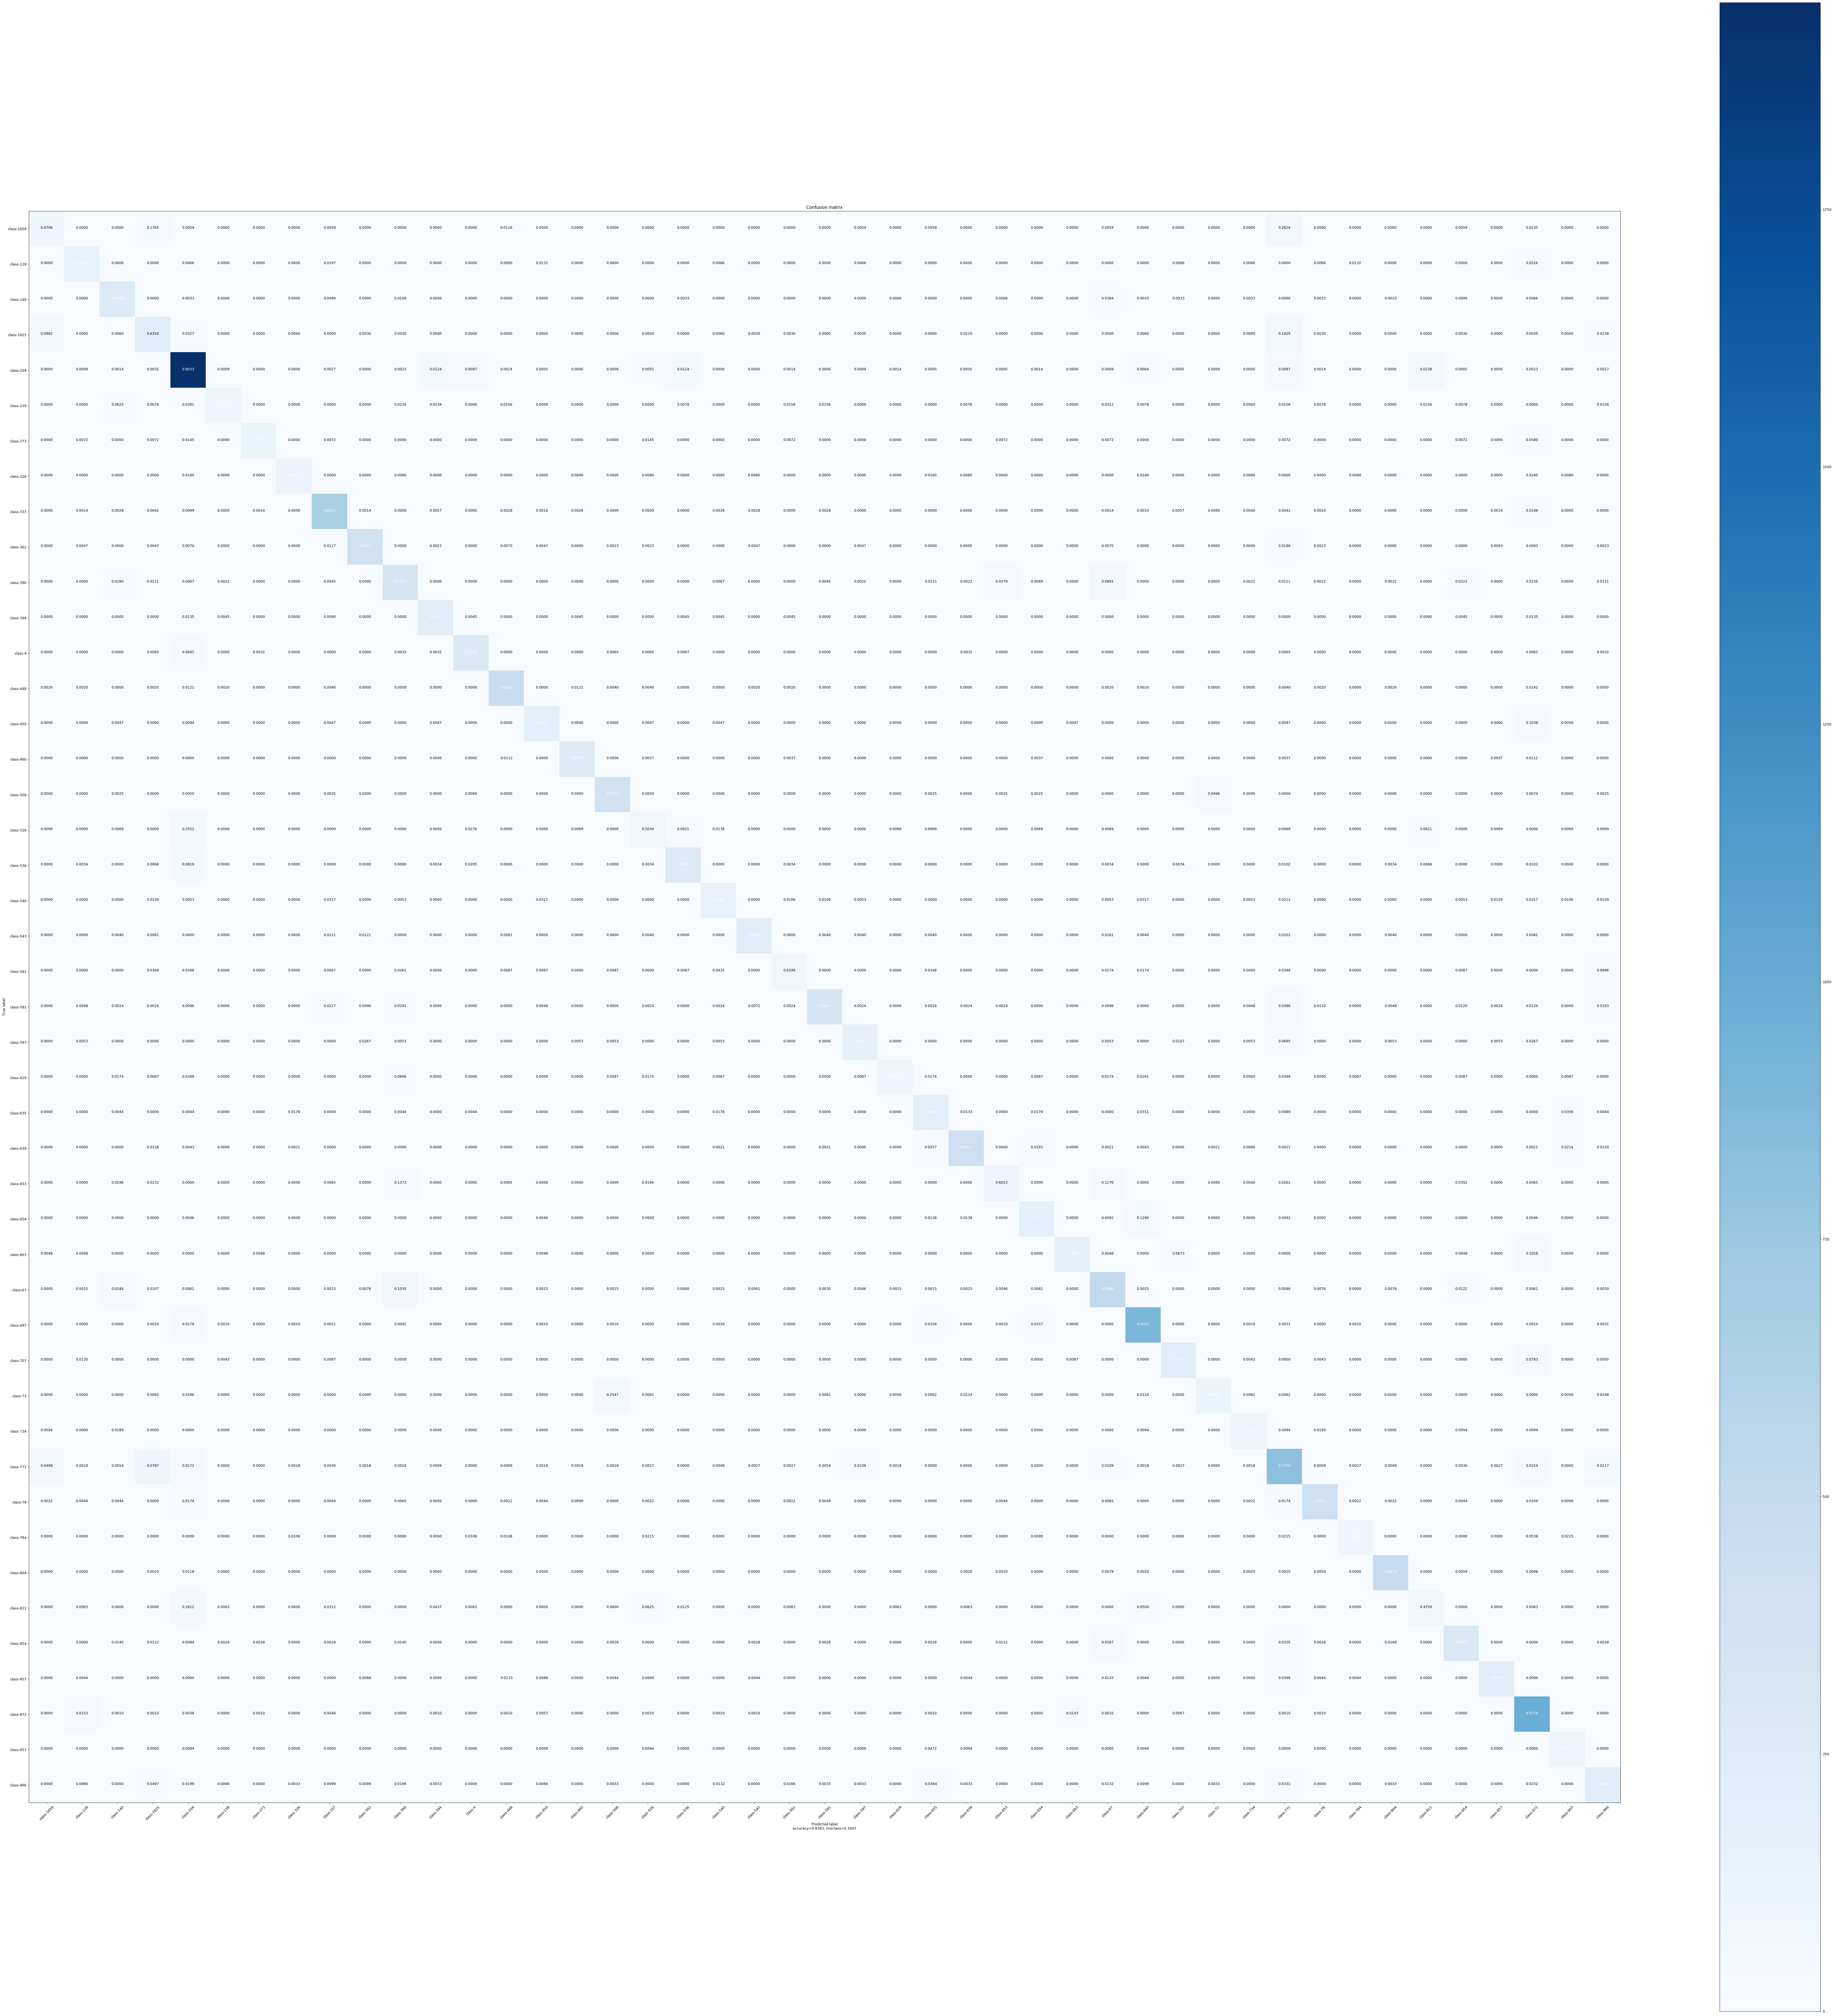

In [198]:
plot_confusion_matrix(cm,target_names=data.classes)

In [280]:
data.classes[16]

'class-508'

In [282]:
data.classes[33]

'class-72'

In [362]:
data.classes

['class-1059',
 'class-128',
 'class-140',
 'class-1625',
 'class-204',
 'class-239',
 'class-273',
 'class-326',
 'class-337',
 'class-362',
 'class-390',
 'class-394',
 'class-4',
 'class-448',
 'class-450',
 'class-460',
 'class-508',
 'class-526',
 'class-536',
 'class-540',
 'class-543',
 'class-561',
 'class-581',
 'class-597',
 'class-629',
 'class-635',
 'class-639',
 'class-653',
 'class-654',
 'class-663',
 'class-67',
 'class-697',
 'class-707',
 'class-72',
 'class-734',
 'class-771',
 'class-78',
 'class-784',
 'class-804',
 'class-811',
 'class-854',
 'class-857',
 'class-872',
 'class-957',
 'class-966']